Veri seti 5 tabloya ayrılmış bir NBA (Ulusal Basketbol Birleşimi) datasıdır. Bu data SQL datası gibi düşünülebilir. 

* Games datası içinde oyunla ilgili veriler sütunlara yerleştirilmiştir. Hem ev sahibi takımın hem de rakip takımın bilgileri burada yer almaktadır. 

* Players datası içinde oyuncuların bilgilerini içeren veriler yer almaktadır. Oynandıgı sezon gibi.

* Ranking datası içinde ise kazanılan, kaybedilen ve toplam maçlar vardır. Ayrıca hem evde kazanılan macların hem de rakip sahasında kazanılan macların bilgileri yer almaktadır.

* Teams datası içerisinde takımların bütün bilgileri vardır. Oyuncularının, arenasının,kapasitesinin ve sahibinin bilgileri gibi.

*  Ayrıca bu data frameleri birbirine baglayan sütunlar da vardır. Bu sütunlar sayesinde datalar birbirine baglanabilir tek tablo gibi işlem yapılabilir.

# Gerekli Kütüphaneler Import Edilir.

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# Veri Okuma

In [2]:
df1 = pd.read_csv("games_details.csv")
df2 = pd.read_csv("games.csv")
df3 = pd.read_csv("players.csv")
df4 = pd.read_csv("ranking.csv")
df5 = pd.read_csv("teams.csv")

/var/folders/8q/h03n02c956b238n6gvvvvc_00000gn/T/ipykernel_2338/1197161066.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("games_details.csv")


# Verinin ilk ve son 5 satırını görüntüleme

In [3]:
df1.head(3)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,NaN,36:22,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,NaN,23:54,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,NaN,25:17,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0


In [4]:
df2.head(3)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0


In [5]:
df3.head(3)

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019


# Verinin boyutunu görme

In [6]:
df4.head(3)

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612756,0,22021,2022-03-12,West,Phoenix,67,53,14,0.791,28-8,25-6,NaN
1,1610612744,0,22021,2022-03-12,West,Golden State,68,46,22,0.676,28-7,18-15,NaN
2,1610612763,0,22021,2022-03-12,West,Memphis,68,46,22,0.676,24-10,22-12,NaN


### Veri seti, 440164 satır ve  33 sütundan oluşmaktadır.

In [7]:
df5.head(3)

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate


### Veri setlerinin boyutu

In [8]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(645953, 29)
(25796, 21)
(7228, 4)
(201792, 13)
(30, 14)


### Veri tipi

In [9]:
print(type(df1))
print(type(df2))
print(type(df3))
print(type(df4))
print(type(df5))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


### Veri seti hakkında Null olmayan değerler ve değişkenlerin tipleri

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645953 entries, 0 to 645952
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            645953 non-null  int64  
 1   TEAM_ID            645953 non-null  int64  
 2   TEAM_ABBREVIATION  645953 non-null  object 
 3   TEAM_CITY          645953 non-null  object 
 4   PLAYER_ID          645953 non-null  int64  
 5   PLAYER_NAME        645953 non-null  object 
 6   NICKNAME           30362 non-null   object 
 7   START_POSITION     247215 non-null  object 
 8   COMMENT            105602 non-null  object 
 9   MIN                540350 non-null  object 
 10  FGM                540350 non-null  float64
 11  FGA                540350 non-null  float64
 12  FG_PCT             540350 non-null  float64
 13  FG3M               540350 non-null  float64
 14  FG3A               540350 non-null  float64
 15  FG3_PCT            540350 non-null  float64
 16  FT

# Veri setindeki null değerleri ve veri tiplerini görme

Veri setindeki değişkenler hem object hem de interger değerlere sahiptir. 

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25796 entries, 0 to 25795
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     25796 non-null  object 
 1   GAME_ID           25796 non-null  int64  
 2   GAME_STATUS_TEXT  25796 non-null  object 
 3   HOME_TEAM_ID      25796 non-null  int64  
 4   VISITOR_TEAM_ID   25796 non-null  int64  
 5   SEASON            25796 non-null  int64  
 6   TEAM_ID_home      25796 non-null  int64  
 7   PTS_home          25697 non-null  float64
 8   FG_PCT_home       25697 non-null  float64
 9   FT_PCT_home       25697 non-null  float64
 10  FG3_PCT_home      25697 non-null  float64
 11  AST_home          25697 non-null  float64
 12  REB_home          25697 non-null  float64
 13  TEAM_ID_away      25796 non-null  int64  
 14  PTS_away          25697 non-null  float64
 15  FG_PCT_away       25697 non-null  float64
 16  FT_PCT_away       25697 non-null  float6

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7228 entries, 0 to 7227
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PLAYER_NAME  7228 non-null   object
 1   TEAM_ID      7228 non-null   int64 
 2   PLAYER_ID    7228 non-null   int64 
 3   SEASON       7228 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 226.0+ KB


In [13]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201792 entries, 0 to 201791
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TEAM_ID        201792 non-null  int64  
 1   LEAGUE_ID      201792 non-null  int64  
 2   SEASON_ID      201792 non-null  int64  
 3   STANDINGSDATE  201792 non-null  object 
 4   CONFERENCE     201792 non-null  object 
 5   TEAM           201792 non-null  object 
 6   G              201792 non-null  int64  
 7   W              201792 non-null  int64  
 8   L              201792 non-null  int64  
 9   W_PCT          201792 non-null  float64
 10  HOME_RECORD    201792 non-null  object 
 11  ROAD_RECORD    201792 non-null  object 
 12  RETURNTOPLAY   3990 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 20.0+ MB


In [14]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LEAGUE_ID           30 non-null     int64  
 1   TEAM_ID             30 non-null     int64  
 2   MIN_YEAR            30 non-null     int64  
 3   MAX_YEAR            30 non-null     int64  
 4   ABBREVIATION        30 non-null     object 
 5   NICKNAME            30 non-null     object 
 6   YEARFOUNDED         30 non-null     int64  
 7   CITY                30 non-null     object 
 8   ARENA               30 non-null     object 
 9   ARENACAPACITY       26 non-null     float64
 10  OWNER               30 non-null     object 
 11  GENERALMANAGER      30 non-null     object 
 12  HEADCOACH           30 non-null     object 
 13  DLEAGUEAFFILIATION  30 non-null     object 
dtypes: float64(1), int64(5), object(8)
memory usage: 3.4+ KB


### Game date est sütununda tarih bazlı veriler var fakat bu verileri object olarak görmektedir. Bunun için düzenleme gereklidir.

In [3]:
df2['GAME_DATE_EST'] = pd.to_datetime(df2['GAME_DATE_EST'])

### Ranking datasındaki STANDINGSDATE sütunu date e dönüştürülmesi

In [4]:
df4['STANDINGSDATE'] = pd.to_datetime(df4['STANDINGSDATE'])

### Veri setlerinin Tanımlayıcı istatistikleri

In [5]:
df1.describe()

,GAME_ID,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,6.459530e+05,6.459530e+05,6.459530e+05,540350.000000,540350.000000,540350.000000,540350.000000,540350.000000,540350.000000,540350.000000,...,540350.000000,540350.000000,540350.000000,540350.000000,540350.000000,540350.000000,540350.000000,540350.000000,540350.000000,516689.000000
mean,2.165952e+07,1.610613e+09,3.716935e+05,3.582408,7.891298,0.416203,0.765731,2.151618,0.199166,1.734931,...,1.026770,3.032875,4.059645,2.097692,0.722541,0.461377,1.321897,2.003018,9.665469,-0.000505
std,5.569116e+06,8.650314e+00,7.348620e+06,3.023962,5.665752,0.251634,1.216917,2.547737,0.289447,2.353475,...,1.400243,2.687996,3.486507,2.473238,0.973573,0.863525,1.402182,1.503081,8.056629,10.640185
min,1.030000e+07,1.610613e+09,1.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-57.000000
25%,2.060113e+07,1.610613e+09,2.435000e+03,1.000000,3.000000,0.263000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,-7.000000
50%,2.120062e+07,1.610613e+09,2.011560e+05,3.000000,7.000000,0.429000,0.000000,1.000000,0.000000,1.000000,...,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000
75%,2.170079e+07,1.610613e+09,2.031240e+05,5.000000,11.000000,0.571000,1.000000,4.000000,0.375000,3.000000,...,2.000000,4.000000,6.000000,3.000000,1.000000,1.000000,2.000000,3.000000,14.000000,6.000000
max,5.200021e+07,1.610613e+09,1.962938e+09,28.000000,50.000000,1.000000,14.000000,24.000000,1.000000,26.000000,...,18.000000,25.000000,31.000000,25.000000,10.000000,12.000000,12.000000,15.000000,81.000000,57.000000


In [6]:
df2.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.579600e+04,2.579600e+04,2.579600e+04,25796.000000,2.579600e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.579600e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25796.000000
mean,2.169208e+07,1.610613e+09,1.610613e+09,2011.798341,1.610613e+09,103.106044,0.460313,0.759705,0.355896,22.736779,43.345799,1.610613e+09,100.294120,0.449265,0.758082,0.349413,21.403899,42.085146,0.587494
std,5.496041e+06,8.638857e+00,8.654846e+00,5.397985,8.638857e+00,13.174726,0.056629,0.100692,0.111940,5.177566,6.621832,8.654846e+00,13.343016,0.055528,0.103418,0.110194,5.140897,6.526951,0.492295
min,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,2.060109e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,94.000000,0.421000,0.696000,0.286000,19.000000,39.000000,1.610613e+09,91.000000,0.412000,0.692000,0.278000,18.000000,38.000000,0.000000
50%,2.120040e+07,1.610613e+09,1.610613e+09,2012.000000,1.610613e+09,103.000000,0.459000,0.765000,0.355000,23.000000,43.000000,1.610613e+09,100.000000,0.448000,0.765000,0.350000,21.000000,42.000000,1.000000
75%,2.170070e+07,1.610613e+09,1.610613e+09,2016.000000,1.610613e+09,112.000000,0.500000,0.829000,0.429000,26.000000,48.000000,1.610613e+09,109.000000,0.487000,0.833000,0.420000,25.000000,46.000000,1.000000
max,5.200021e+07,1.610613e+09,1.610613e+09,2021.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,1.610613e+09,168.000000,0.687000,1.000000,1.000000,46.000000,81.000000,1.000000


In [7]:
df3.describe()

,TEAM_ID,PLAYER_ID,SEASON
count,7.228000e+03,7.228000e+03,7228.000000
mean,1.610613e+09,2.355862e+06,2014.159934
std,8.723521e+00,6.106688e+07,3.126216
min,1.610613e+09,2.440000e+02,2009.000000
25%,1.610613e+09,2.007680e+05,2012.000000
50%,1.610613e+09,2.023465e+05,2014.000000
75%,1.610613e+09,2.039100e+05,2017.000000
max,1.610613e+09,1.962938e+09,2019.000000


In [8]:
df4.describe()

,TEAM_ID,LEAGUE_ID,SEASON_ID,G,W,L,W_PCT,RETURNTOPLAY
count,2.017920e+05,201792.0,201792.000000,201792.000000,201792.000000,201792.000000,201792.000000,3990.000000
mean,1.610613e+09,0.0,21401.535210,56.475455,28.241278,28.234177,0.492745,0.600000
std,8.640908e+00,0.0,2393.667432,28.505551,17.214043,17.205158,0.187940,0.489959
min,1.610613e+09,0.0,12003.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.610613e+09,0.0,22006.000000,33.000000,14.000000,14.000000,0.371000,0.000000
50%,1.610613e+09,0.0,22011.000000,66.000000,28.000000,28.000000,0.500000,1.000000
75%,1.610613e+09,0.0,22016.000000,82.000000,42.000000,41.000000,0.621000,1.000000
max,1.610613e+09,0.0,22021.000000,82.000000,73.000000,72.000000,1.000000,1.000000


In [9]:
df5.describe()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,YEARFOUNDED,ARENACAPACITY
count,30.0,3.000000e+01,30.000000,30.0,30.000000,26.000000
mean,0.0,1.610613e+09,1969.700000,2019.0,1969.700000,18553.307692
std,0.0,8.803408e+00,16.698441,0.0,16.698441,3916.923362
min,0.0,1.610613e+09,1946.000000,2019.0,1946.000000,0.000000
25%,0.0,1.610613e+09,1952.000000,2019.0,1952.000000,18641.500000
50%,0.0,1.610613e+09,1970.000000,2019.0,1970.000000,19131.000000
75%,0.0,1.610613e+09,1979.000000,2019.0,1979.000000,19790.750000
max,0.0,1.610613e+09,2002.000000,2019.0,2002.000000,21711.000000


### Veri setindeki duplicate verileri kaldırmak

In [10]:
df1 = df1.drop_duplicates()

In [11]:
df2 = df2.drop_duplicates()

In [12]:
df3 = df3.drop_duplicates()

In [13]:
df4 = df4.drop_duplicates()

In [14]:
df5 = df5.drop_duplicates()

### df2 de bulunan GAME_STATUS_TEXT sütunu

In [15]:
df2["GAME_STATUS_TEXT"].value_counts()

Final    25796
Name: GAME_STATUS_TEXT, dtype: int64

In [16]:
df2.drop('GAME_STATUS_TEXT', axis=1, inplace=True)

### İsim değiştirilmesi

In [17]:
df1.rename(columns={'PF': 'Pers_Faul', 'MIN': 'Play_Min', 'OREB': 'Ofan_Ribond', 'DREB': 'Defans_Ribond', 'REB': 'Tot_Ribond'}, inplace=True)

In [18]:
df2.rename(columns={'FG_PCT_home': 'atis_yuzd', 'FT_PCT_home': 'total_atis_yuzd', 'FG3_PCT_home': '3_atis_yuzd'}, inplace=True)

# Veri setinde bulunan eksik değerler

### Eksik değerleri ve yüzdelik dilimlerini görmek için bir fonksiyon oluturulmuştur. Oluşturulna fonksiyon, eksik değerlerin veri setindeki değişkenleri ne kadar etkilediğini göstermektedir.

#### 6 değişkende null değer yoktur fakat diğer değişkenler null değer içermektedir. Değişkenlerde eksik gözlem yüzdesi fazladır. Bu durumda bu değişkenler işe yarar bir analiz sonucu çıkartmayacağı için veri setinden çıkartılmalıdır. Object olan değişkenlerde bulunan null değerler doldurulamayacaktır. (En çok tekrar eden değer ile doldurulabilir fakat bazı yanlış sonuçlara sebep olabilir.) Bu yüzden, önemli görülmeyen ve eksik verisi çok fazla olan değişkenler veri setinden çıkartılacaktır. Kalan değişkenler için de satır bazlı veri çıkartma işlemi gerçekleştirilebilir.

In [19]:
#Eksik değer tablosu
def eksik_deger_tablosu(df): 
    eksik_deger = df.isnull().sum()
    eksik_deger_yuzde = 100 * df.isnull().sum()/len(df)
    eksik_deger_tablo = pd.concat([eksik_deger, eksik_deger_yuzde], axis=1)
    eksik_deger_tablo_son = eksik_deger_tablo.rename(
    columns = {0 : 'Eksik Değerler', 1 : '% Değeri'})
    return eksik_deger_tablo_son
  
eksik_deger_tablosu(df1).sort_values("% Değeri")

,Eksik Değerler,% Değeri
GAME_ID,0,0.000000
TEAM_ID,0,0.000000
TEAM_ABBREVIATION,0,0.000000
TEAM_CITY,0,0.000000
PLAYER_ID,0,0.000000
PLAYER_NAME,0,0.000000
Pers_Faul,105603,16.348403
TO,105603,16.348403
BLK,105603,16.348403
STL,105603,16.348403


# %60 üzerinde null değer içeren kolonları sil

In [20]:
tr = len(df1) * .4
df1.dropna(thresh = tr, axis = 1, inplace = True)
df1

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,Play_Min,FGM,FGA,FG_PCT,...,Ofan_Ribond,Defans_Ribond,Tot_Ribond,AST,STL,BLK,TO,Pers_Faul,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,36:22,4.0,10.0,0.400,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,23:54,6.0,8.0,0.750,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,25:17,4.0,9.0,0.444,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,30:52,4.0,9.0,0.444,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,33:46,3.0,13.0,0.231,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645948,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,19,4.0,9.0,0.444,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
645949,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,23,7.0,11.0,0.636,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
645950,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,15,3.0,7.0,0.429,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
645951,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,19,1.0,1.0,1.000,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


### df1 için sütun bazlı veri doldurma işlemi


In [21]:
values = {"FGM": 3.61, "FGA": 7.93, "FG_PCT": 0.41, "FG3M": 0.75, "FG3A": 2.12, "FG3_PCT": 0.19, "FTM": 1.78, "Ofan_Ribond": 1.04, "Defans_Ribond": 3.03, "Tot_Ribond": 4.07, "AST": 2.11, "STL": 0.72, "BLK": 0.46, "Pers_Faul": 2.04, "PTS": 9.75}
df1.fillna(value=values)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,Play_Min,FGM,FGA,FG_PCT,...,Ofan_Ribond,Defans_Ribond,Tot_Ribond,AST,STL,BLK,TO,Pers_Faul,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,36:22,4.0,10.0,0.400,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,23:54,6.0,8.0,0.750,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,25:17,4.0,9.0,0.444,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,30:52,4.0,9.0,0.444,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,33:46,3.0,13.0,0.231,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645948,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,19,4.0,9.0,0.444,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
645949,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,23,7.0,11.0,0.636,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
645950,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,15,3.0,7.0,0.429,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
645951,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,19,1.0,1.0,1.000,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


In [22]:
eksik_deger_tablosu(df2).sort_values("% Değeri")

,Eksik Değerler,% Değeri
GAME_DATE_EST,0,0.00000
TEAM_ID_away,0,0.00000
TEAM_ID_home,0,0.00000
SEASON,0,0.00000
HOME_TEAM_WINS,0,0.00000
HOME_TEAM_ID,0,0.00000
GAME_ID,0,0.00000
VISITOR_TEAM_ID,0,0.00000
PTS_home,99,0.38378
atis_yuzd,99,0.38378


### Eksik gözlemleri çıkartma

In [23]:
values = {"PTS_home": 103.11, "atis_yuxd": 0.46, "total_atis_yuzd": 0.76, "3_atis_yuzd": 0.35, "AST_home": 22.74, "REB_home": 43.35, "PST_away": 100.29, "FG_PCT_away": 0.45, "FT_PCT_away": 0.76, "FG3_PCT_away": 0.34, "AST_away": 21.4, "REB_away": 42.09, "HOME_TEAM_WINS": 0.58}
df2.fillna(value=values)

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,atis_yuzd,total_atis_yuzd,3_atis_yuzd,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,0.333,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,0.429,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,0.324,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,0.400,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,0.407,32.0,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25791,2014-10-06,11400007,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,0.421,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
25792,2014-10-06,11400004,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,0.381,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
25793,2014-10-06,11400005,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,0.500,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
25794,2014-10-05,11400002,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,0.333,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


### Tablodaki unique değerler görülmek istenirse

In [24]:
df1.nunique()

GAME_ID              25668
TEAM_ID                 30
TEAM_ABBREVIATION       34
TEAM_CITY               33
PLAYER_ID             2575
PLAYER_NAME           2549
Play_Min              3394
FGM                     26
FGA                     47
FG_PCT                 308
FG3M                    15
FG3A                    25
FG3_PCT                108
FTM                     27
FTA                     33
FT_PCT                 163
Ofan_Ribond             18
Defans_Ribond           25
Tot_Ribond              32
AST                     26
STL                     11
BLK                     13
TO                      13
Pers_Faul                8
PTS                     66
PLUS_MINUS             108
dtype: int64

In [25]:
df2.nunique()

GAME_DATE_EST       4149
GAME_ID            25767
HOME_TEAM_ID          30
VISITOR_TEAM_ID       30
SEASON                19
TEAM_ID_home          30
PTS_home             100
atis_yuzd            399
total_atis_yuzd      403
3_atis_yuzd          427
AST_home              42
REB_home              55
TEAM_ID_away          30
PTS_away             106
FG_PCT_away          390
FT_PCT_away          380
FG3_PCT_away         409
AST_away              41
REB_away              52
HOME_TEAM_WINS         2
dtype: int64

### Puan tablosu için gruplama

In [26]:
df1["PTS"].value_counts()

0.0     63981
2.0     45875
4.0     35296
6.0     33039
8.0     29470
        ...  
58.0        4
59.0        4
65.0        1
81.0        1
70.0        1
Name: PTS, Length: 66, dtype: int64

In [27]:
points = []

for i in df1.PTS:
    if i >= 35:
        points.append("Çok")
    elif i < 35 and i >= 15:
        points.append("Orta")
    else:
        points.append("Az")

df1["Points"] = points
df1

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,Play_Min,FGM,FGA,FG_PCT,...,Defans_Ribond,Tot_Ribond,AST,STL,BLK,TO,Pers_Faul,PTS,PLUS_MINUS,Points
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,36:22,4.0,10.0,0.400,...,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0,Orta
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,23:54,6.0,8.0,0.750,...,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0,Az
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,25:17,4.0,9.0,0.444,...,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0,Orta
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,30:52,4.0,9.0,0.444,...,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0,Az
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,33:46,3.0,13.0,0.231,...,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0,Az
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645948,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,19,4.0,9.0,0.444,...,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN,Orta
645949,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,23,7.0,11.0,0.636,...,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN,Orta
645950,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,15,3.0,7.0,0.429,...,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN,Az
645951,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,19,1.0,1.0,1.000,...,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN,Az


Text(0.5, 1.0, 'Puan Tablosu')

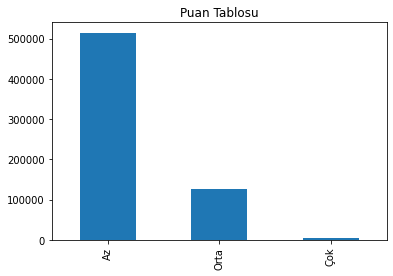

In [28]:
(df1["Points"]
.value_counts()
.plot
.bar()
.set_title("Puan Tablosu"))

### Asist tablosu için gruplama

In [29]:
df1["AST"].value_counts()

0.0     166337
1.0     123188
2.0      83588
3.0      55196
4.0      36282
5.0      24084
6.0      16648
7.0      11514
8.0       7774
9.0       5263
10.0      3772
11.0      2539
12.0      1557
13.0      1012
14.0       649
15.0       426
16.0       224
17.0       142
18.0        60
19.0        44
20.0        30
21.0        11
24.0         4
22.0         3
23.0         2
25.0         1
Name: AST, dtype: int64

In [30]:
asist = []

for i in df1.AST:
    if i >= 10:
        asist.append("Yüksek")
    elif i < 10 and i >= 3:
        asist.append("Orta")
    else:
        asist.append("Düşük")

df1["Asist"] = asist
df1

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,Play_Min,FGM,FGA,FG_PCT,...,Tot_Ribond,AST,STL,BLK,TO,Pers_Faul,PTS,PLUS_MINUS,Points,Asist
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,36:22,4.0,10.0,0.400,...,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0,Orta,Orta
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,23:54,6.0,8.0,0.750,...,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0,Az,Düşük
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,25:17,4.0,9.0,0.444,...,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0,Orta,Düşük
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,30:52,4.0,9.0,0.444,...,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0,Az,Düşük
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,33:46,3.0,13.0,0.231,...,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0,Az,Orta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645948,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,19,4.0,9.0,0.444,...,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN,Orta,Düşük
645949,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,23,7.0,11.0,0.636,...,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN,Orta,Düşük
645950,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,15,3.0,7.0,0.429,...,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN,Az,Düşük
645951,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,19,1.0,1.0,1.000,...,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN,Az,Düşük


Text(0.5, 1.0, 'Asist Sayı Tablosu')

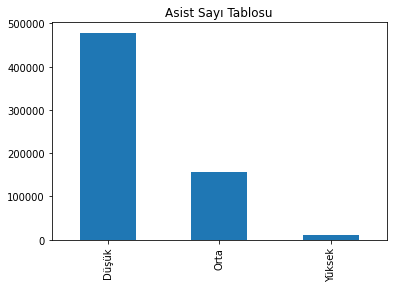

In [31]:
(df1["Asist"]
.value_counts()
.plot
.bar()
.set_title("Asist Sayı Tablosu"))

### Steal tablosu için gruplama

In [32]:
df1["STL"].value_counts()

0.0     289454
1.0     155840
2.0      63684
3.0      21843
4.0       6879
5.0       1966
6.0        512
7.0        121
8.0         40
9.0          7
10.0         4
Name: STL, dtype: int64

In [33]:
steal = []

for i in df1.AST:
    if i >= 8:
        steal.append("Yüksek")
    elif i < 8 and i >= 2:
        steal.append("Orta")
    else:
        steal.append("Düşük")

df1["Steal"] = steal
df1

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,Play_Min,FGM,FGA,FG_PCT,...,AST,STL,BLK,TO,Pers_Faul,PTS,PLUS_MINUS,Points,Asist,Steal
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,36:22,4.0,10.0,0.400,...,5.0,3.0,1.0,1.0,1.0,15.0,5.0,Orta,Orta,Orta
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,23:54,6.0,8.0,0.750,...,0.0,0.0,2.0,2.0,6.0,14.0,10.0,Az,Düşük,Düşük
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,25:17,4.0,9.0,0.444,...,0.0,0.0,0.0,3.0,4.0,15.0,14.0,Orta,Düşük,Düşük
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,30:52,4.0,9.0,0.444,...,1.0,1.0,0.0,1.0,4.0,12.0,20.0,Az,Düşük,Düşük
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,33:46,3.0,13.0,0.231,...,9.0,1.0,0.0,5.0,0.0,14.0,17.0,Az,Orta,Yüksek
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645948,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,19,4.0,9.0,0.444,...,0.0,2.0,0.0,1.0,3.0,17.0,NaN,Orta,Düşük,Düşük
645949,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,23,7.0,11.0,0.636,...,1.0,1.0,0.0,3.0,3.0,18.0,NaN,Orta,Düşük,Düşük
645950,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,15,3.0,7.0,0.429,...,0.0,1.0,0.0,0.0,3.0,6.0,NaN,Az,Düşük,Düşük
645951,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,19,1.0,1.0,1.000,...,1.0,0.0,0.0,4.0,2.0,2.0,NaN,Az,Düşük,Düşük


Text(0.5, 1.0, 'Top Çalma Sayısı Tablosu')

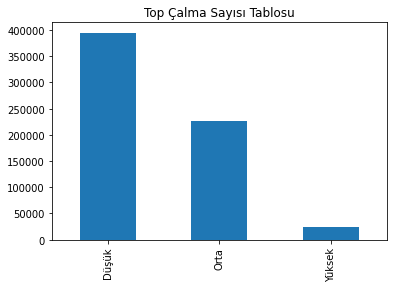

In [34]:

(df1["Steal"]
.value_counts()
.plot
.bar()
.set_title("Top Çalma Sayısı Tablosu"))

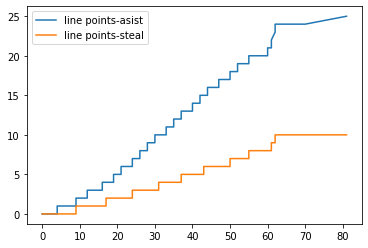

In [35]:
# plot lines
p = df1["PTS"].sort_values()
a = df1["AST"].sort_values()
s = df1["STL"].sort_values()
plt.plot(p, a, label = "line points-asist")
plt.plot(p, s, label = "line points-steal")
plt.legend()
plt.show()

In [36]:
df1 = df1.dropna()

### Games detail tablosundan elde edilen kategorik verilerin Asist ve StealEin Puan numerik değerine göre grafigi verilmiştir.

<AxesSubplot:xlabel='Steal'>

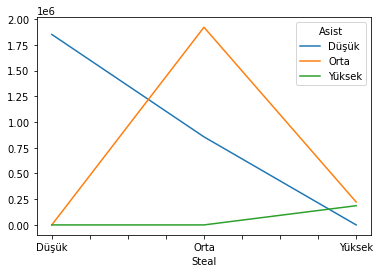

In [37]:
pd.pivot_table(df1, values='PTS', index=["Steal"],
                    columns=['Asist'], aggfunc=np.sum).fillna(0).plot()


### Şehirler sütununun bar grafigi elde edilmiştir.

Text(0.5, 1.0, 'Şehirler Tablosu')

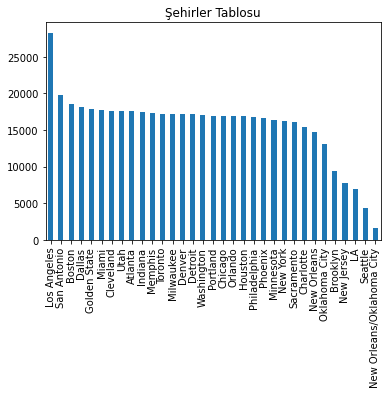

In [38]:
(df1["TEAM_CITY"]
.value_counts()
.plot
.bar()
.set_title("Şehirler Tablosu"))

### Games details ve ranking tabloları birleştirme işlemi

In [39]:
df_34 = pd.merge(df3, df4, on = "TEAM_ID", how =  "outer")
df_34

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,Royce O'Neale,1610612762,1626220,2019,0,22021,2022-03-12,West,Utah,67,42,25,0.627,24-10,18-15,NaN
1,Royce O'Neale,1610612762,1626220,2019,0,22021,2022-03-11,West,Utah,66,41,25,0.621,23-10,18-15,NaN
2,Royce O'Neale,1610612762,1626220,2019,0,22021,2022-03-10,West,Utah,65,41,24,0.631,23-10,18-14,NaN
3,Royce O'Neale,1610612762,1626220,2019,0,22021,2022-03-09,West,Utah,65,41,24,0.631,23-10,18-14,NaN
4,Royce O'Neale,1610612762,1626220,2019,0,22021,2022-03-08,West,Utah,64,40,24,0.625,22-10,18-14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48622248,Andre Barrett,1610612739,2857,2009,0,22013,2014-09-05,East,Cleveland,82,33,49,0.402,19-22,14-27,NaN
48622249,Andre Barrett,1610612739,2857,2009,0,22013,2014-09-04,East,Cleveland,82,33,49,0.402,19-22,14-27,NaN
48622250,Andre Barrett,1610612739,2857,2009,0,22013,2014-09-03,East,Cleveland,82,33,49,0.402,19-22,14-27,NaN
48622251,Andre Barrett,1610612739,2857,2009,0,22013,2014-09-02,East,Cleveland,82,33,49,0.402,19-22,14-27,NaN


### Sezonlara göre Doğu'da mı Batı'da mı yapıldıgına dair bilgi

Text(0.5, 1.0, 'Sezona göre Doğu ve Batı Takımları')

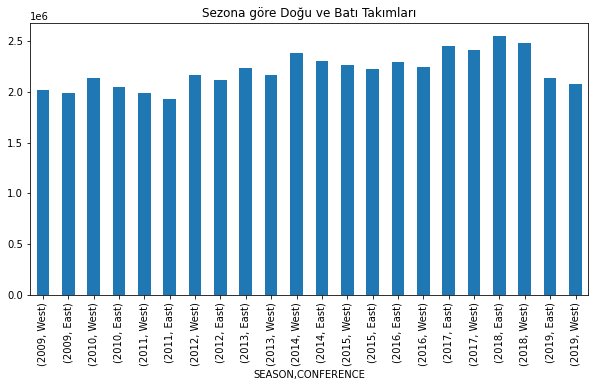

In [40]:
(df_34.groupby("SEASON")["CONFERENCE"].value_counts()
.plot.bar(figsize=(10, 5))
.set_title("Sezona göre Doğu ve Batı Takımları"))

### Sezonların pie grafigi 

<AxesSubplot:ylabel='SEASON'>

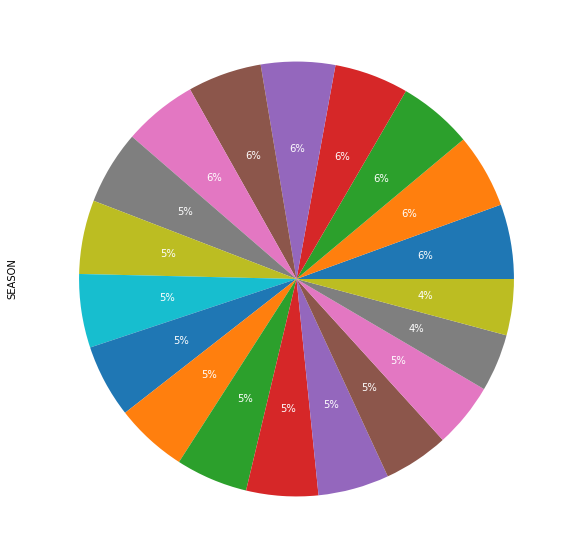

In [41]:
df2["SEASON"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10), textprops={'color':"w"})

### Asist ve top çalmanın arasındaki line grafigi

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='STL', ylabel='AST'>

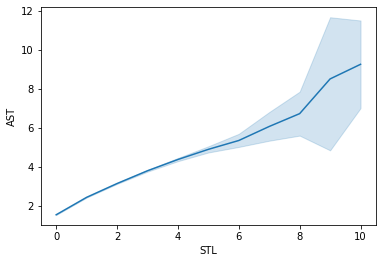

In [42]:
sns.lineplot( df1['STL'], df1['AST'])

### Doğu veya Batı olmasına göre Kazanma ve Kaybetme sayıları

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='W', ylabel='L'>

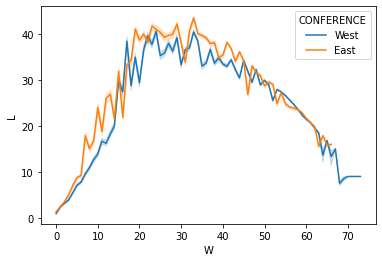

In [43]:
sns.lineplot(df4['W'], df4['L'], hue =df4["CONFERENCE"])

### Kazanılan Oyunların yüzdesi density Plot

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='W_PCT', ylabel='Density'>

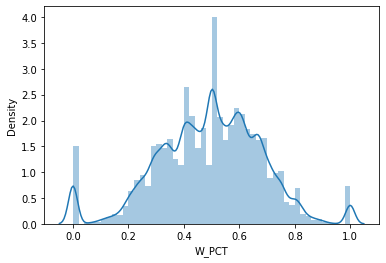

In [30]:
sns.distplot(df4['W_PCT'])

### Toplam atış yüzdesine göre 3 lük atış ve normal atış yüzdesi grafigi

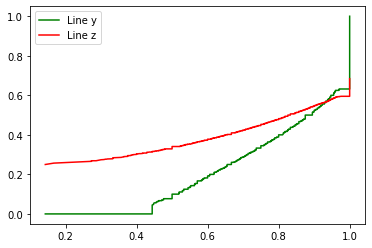

In [29]:
x = df2["total_atis_yuzd"].sort_values()
y = df2["3_atis_yuzd"].sort_values()
z = df2["atis_yuzd"].sort_values()
plt.plot(x, y, 'g', label='Line y')
plt.plot(x, z, 'r', label='Line z')
plt.legend()
plt.show()

### Games datasının değişkenleri arasındaki ilişki 

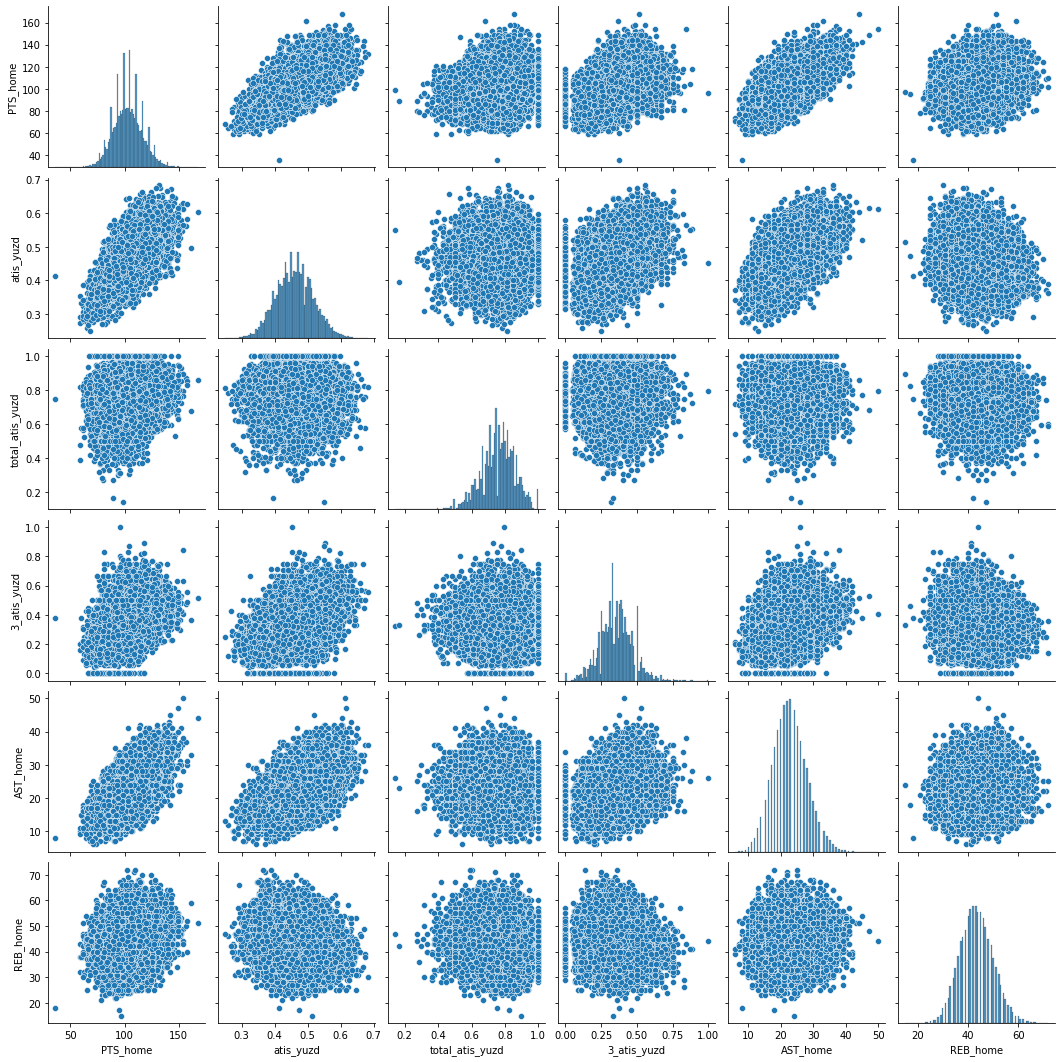

In [30]:
df_corr = df2[["PTS_home",	"atis_yuzd",	"total_atis_yuzd",	"3_atis_yuzd",	"AST_home",	"REB_home"]]

# without regression
sns.pairplot(df_corr, kind="scatter")
plt.show()

### Toplam atış yüzdesi grafik

In [38]:
df2["total_atis_yuzd"].value_counts().sort_index()

0.143      1
0.167      1
0.273      2
0.286      1
0.300      1
        ... 
0.970      4
0.971      3
0.972      1
0.976      1
1.000    268
Name: total_atis_yuzd, Length: 403, dtype: int64

In [44]:
total_atis_yuzdesi = []

for i in df2.total_atis_yuzd:
    if i >= 0.9:
        total_atis_yuzdesi.append("Yüksek")
    elif i < 0.9 and i >= 0.6:
        total_atis_yuzdesi.append("Orta")
    else:
        total_atis_yuzdesi.append("Düşük")

df2["Total_Atis_Yüzdesi"] = total_atis_yuzdesi
df2

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,atis_yuzd,total_atis_yuzd,3_atis_yuzd,...,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,Total_Atis_Yüzdesi
0,2022-03-12,22101005,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,0.333,...,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0,Orta
1,2022-03-12,22101006,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,0.429,...,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1,Yüksek
2,2022-03-12,22101007,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,0.324,...,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0,Orta
3,2022-03-12,22101008,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,0.400,...,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1,Yüksek
4,2022-03-12,22101009,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,0.407,...,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0,Orta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25791,2014-10-06,11400007,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,0.421,...,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1,Orta
25792,2014-10-06,11400004,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,0.381,...,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0,Orta
25793,2014-10-06,11400005,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,0.500,...,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1,Orta
25794,2014-10-05,11400002,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,0.333,...,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1,Orta


Text(0.5, 1.0, 'Toplam atıs yüzdesi Tablosu')

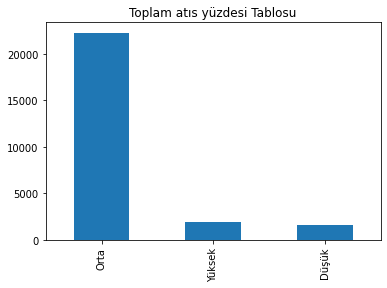

In [32]:
(df2["Total_Atis_Yüzdesi"]
.value_counts()
.plot
.bar()
.set_title("Toplam atıs yüzdesi Tablosu"))

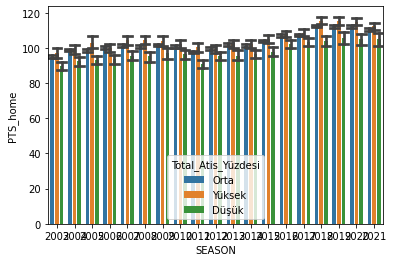

In [45]:
fig, ax = plt.subplots()

x = df2["SEASON"]
y = df2["PTS_home"]
sns.barplot(x=x,y=y,data=df2, hue="Total_Atis_Yüzdesi", ax=ax, capsize=0.5)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .20)
plt.show()

### Games verisinde ver alan sayısal degerlerin kutu grafigi

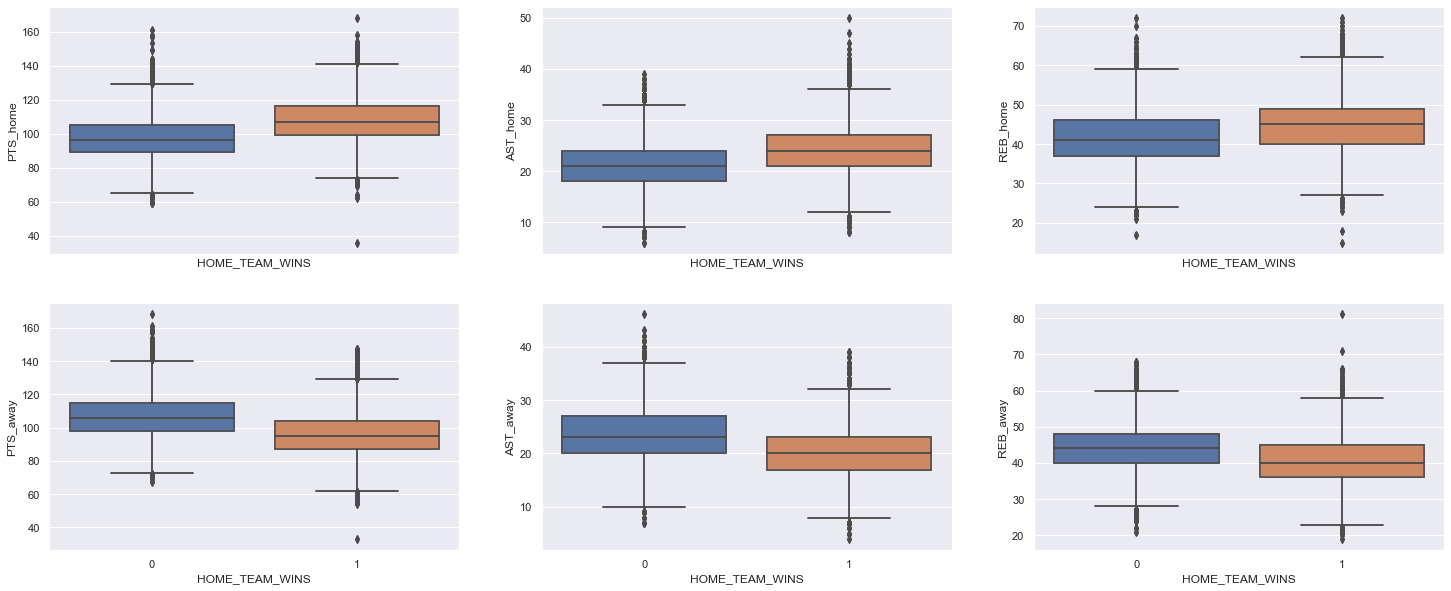

In [34]:
sns.set(style="darkgrid")

plot_list=["PTS_home","AST_home","REB_home","PTS_away","AST_away","REB_away"]

fig, axes =plt.subplots(2,3, figsize=(25,10), sharex=True)

for j in range(2):
    for i,ax in enumerate(axes.flat):
        
        sns.boxplot(x="HOME_TEAM_WINS",y=plot_list[i], data=df2, ax=ax)

### Games veri seti ile çalışıyoruz. İlk olarak gereksiz olan değişkenler cıkartılsın.

In [46]:
season_s = []

for i in df2.SEASON:
    if i >= 2012:
        season_s.append("gelecek")
    elif i < 2012 and i >= 2006:
        season_s.append("şimdi")
    else:
        season_s.append("geçmiş")

df2["season_s"] = season_s
df2

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,atis_yuzd,total_atis_yuzd,3_atis_yuzd,...,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,Total_Atis_Yüzdesi,season_s
0,2022-03-12,22101005,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,0.333,...,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0,Orta,gelecek
1,2022-03-12,22101006,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,0.429,...,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1,Yüksek,gelecek
2,2022-03-12,22101007,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,0.324,...,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0,Orta,gelecek
3,2022-03-12,22101008,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,0.400,...,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1,Yüksek,gelecek
4,2022-03-12,22101009,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,0.407,...,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0,Orta,gelecek
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25791,2014-10-06,11400007,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,0.421,...,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1,Orta,gelecek
25792,2014-10-06,11400004,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,0.381,...,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0,Orta,gelecek
25793,2014-10-06,11400005,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,0.500,...,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1,Orta,gelecek
25794,2014-10-05,11400002,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,0.333,...,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1,Orta,gelecek


In [47]:
games = df2.drop(["GAME_DATE_EST", "GAME_ID", "HOME_TEAM_ID", "VISITOR_TEAM_ID", "TEAM_ID_home", "TEAM_ID_away"], axis=1)

### Veri setimizde bulunan kolonların istatistiksel sonuçlarını görmek için “describe” komutundan yararlanıldı. Bu sayede her bir kolon hakkında fikir sahibi olabiliriz. 

In [44]:
games.describe()

,SEASON,PTS_home,atis_yuzd,total_atis_yuzd,3_atis_yuzd,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,25796.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25796.000000
mean,2011.798341,103.106044,0.460313,0.759705,0.355896,22.736779,43.345799,100.294120,0.449265,0.758082,0.349413,21.403899,42.085146,0.587494
std,5.397985,13.174726,0.056629,0.100692,0.111940,5.177566,6.621832,13.343016,0.055528,0.103418,0.110194,5.140897,6.526951,0.492295
min,2003.000000,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,2007.000000,94.000000,0.421000,0.696000,0.286000,19.000000,39.000000,91.000000,0.412000,0.692000,0.278000,18.000000,38.000000,0.000000
50%,2012.000000,103.000000,0.459000,0.765000,0.355000,23.000000,43.000000,100.000000,0.448000,0.765000,0.350000,21.000000,42.000000,1.000000
75%,2016.000000,112.000000,0.500000,0.829000,0.429000,26.000000,48.000000,109.000000,0.487000,0.833000,0.420000,25.000000,46.000000,1.000000
max,2021.000000,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,168.000000,0.687000,1.000000,1.000000,46.000000,81.000000,1.000000


### Daha önceden null değerler doldurulmuştu.

### Veri setimiz üzerindeki gerekli düzeltmeleri yaptıktan sonra görselleştirme yapılsın.

### Üretilen histogram’ı incelediğimizde, kazananların genellikle 2012 sonrası oldugu görülmektedir.

<AxesSubplot:>

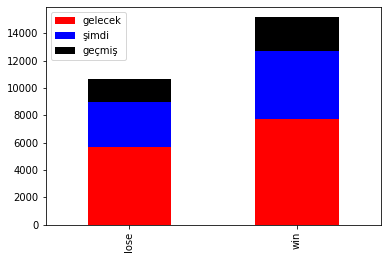

In [48]:
import matplotlib.pyplot as plt
colors = ["r", "b", "k"]
win_ = games[games["HOME_TEAM_WINS"]== 1]["season_s"].value_counts()
lose_ = games[games["HOME_TEAM_WINS"]==0]["season_s"].value_counts()
games_ = pd.DataFrame([lose_, win_])
games_.index = ["lose","win"]
games_.plot.bar(stacked=True,color=colors)